<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li></ul></div>

# Защита персональных данных клиентов

Нужно защитить данные клиентов страховой компании «Хоть потоп». 

Наша задача - защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется. Необходимо разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. 

## Загрузка данных

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
# константы проекта
State = 12345
r = np.random.RandomState(State)

In [3]:
data = pd.read_csv('/datasets/insurance.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Для экономии места можем конвертировать столбцы типа float64 в тип int64. Но сначала убедимся, что мы не потеряем никаких данных, "округлив" значения до целого.

In [5]:
# проверим, есть ли дробная часть у столбцов "Возраст" и "Зарплата"
print('Сумма дробной части по столбцу Возраст', (data['Возраст']%1).sum())
print('Сумма дробной части по столбцу Зарплата', (data['Зарплата']%1).sum())

Сумма дробной части по столбцу Возраст 0.0
Сумма дробной части по столбцу Зарплата 3.0000000001200533


Таким образом, мы выявили, что у столбца "Возраст" нет дробной части, а у столбца "Зарплата" есть дробная часть как минимум для нескольких объектов, рассматрим их поподробнее.

In [6]:
data['Дробная часть'] = data['Зарплата']%1
data[(data['Зарплата']%1)>0]

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты,Дробная часть
80,1,41.0,32700.0,0,0,3.637979e-12
159,1,19.0,64900.0,2,0,7.275958e-12
313,0,25.0,32700.0,1,0,3.637979e-12
392,1,43.0,32700.0,1,1,3.637979e-12
448,1,32.0,32700.0,2,0,3.637979e-12
772,1,20.0,65100.0,1,0,1.000000e+00
820,0,29.0,32200.0,2,0,3.637979e-12
872,0,23.0,32200.0,3,0,3.637979e-12
911,0,30.0,32200.0,0,0,3.637979e-12
963,1,20.0,64100.0,0,0,1.000000e+00


Судя по внешнему виду значений, эти отклонения вызваны какими-то техническими особенностями внесения / копирования / расчета данных и не несут никакой существенной ценности в плане информативности. Их потеря не приведет к потере точности расчетов. <br>
Теперь можем перевести эти столбцы в формат int.

In [7]:
data['Возраст'] = data['Возраст'].astype(int)
data['Зарплата'] = data['Зарплата'].astype(int)
data = data.drop('Дробная часть', axis =1)

Проверим распределение данных в столбцах.

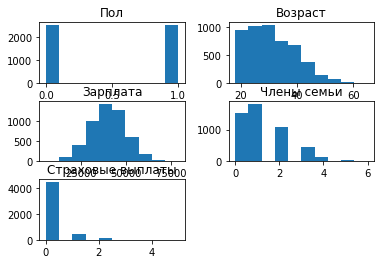

In [8]:
data.hist(grid = False);

Посмотрим, какова корреляция между каждым из признаков и целевым признаком:

In [9]:
data.corr().style.background_gradient(axis=None, vmin=0, vmax=1, cmap="YlGnBu")

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.002074,0.014910,-0.008991,0.010140
Возраст,0.002074,1.000000,-0.019093,-0.006692,0.651030
Зарплата,0.014910,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.010140,0.651030,-0.014963,-0.036290,1.000000


Есть прямая корреляция между Страховыми выплатами и Возрастом. По остальным столбцам прямой или обратной корреляции практически нет.

Судя по таблицам и графикам, данные достаточно качественные, предобработка и очистка не требуется. Нет значительных выбросов и экстремальных значений, нет null'овых значений и нулей.
Можно приступать к основной задаче.

## Умножение матриц

**Вопрос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? <br>
a. Изменится. Приведите примеры матриц.<br>
b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной. <br>


Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $M$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Качество линейной регрессии не изменится.

**Обоснование:**
<br>
Можно привести обоснование вывода при помощи формул.
<br>
Допустим, нам необходимо сделать предсказания ***(b)*** на основе новой матрицы признаков, которая получилась из первичной матрицы ***Х*** путем умножения ее на обратимую матрицу ***М***.
$$
b = XMw_1
$$
Тогда формула обучения для этой матрицы будет выглядеть следующим образом:
$$
w_1 = ((XM)^T (XM))^{-1}(XM)^Ty
$$

Если подставить в формулу расчета ***b*** это новое уравнение, то получится следующее:
$$
b = (XM)((XM)^T (XM))^{-1}(XM)^Ty
$$

Так как транспонированное произведение матриц равно произведению транспонированных матриц (пр.1), то мы можем выразить ***b*** следующим образом:
$$
b = (XM)(M^T X^T XM)(XM)^T y
$$
и теперь можем применить обращение к трем элементам в скобках:
$$
b = XM M^{-1}(X^TX)^{-1}(M^T)^{-1}(XM)^T y
$$

Произведение матрицы М и матрицы, обратной М, дает нам единичную матрицу ***Е***.
$$
b = X E (X^TX)^{-1} (M^T)^{-1}(XM)^T y
$$
Аналогично применим пр.1 к (XM)^T, и это выражение принимает вид:
$$
b = X (X^T X)^{-1} (M^T)^{-1} M^T X^T y
$$
а произведение M^T и матрицы, обратной ей, опять дает единичную матрицу Е:
$$
b = X (X^T X)^{-1} E X^T y
$$
что, по сути, и дает нам:
$$
b = X(X^T X)^{-1} X^T y = Xw
$$
А значит *b = a*. Предсказания на новой матрице равны предсказаниям на изначальной. 

## Алгоритм преобразования

**Алгоритм**

Для защиты информации мы предусмотрим шифрование признаков с помощью домножения матрицы значений на произвольно сгенерированную обратимую матрицу. <br>
Этапы: <br>
1. Разделение датасета на признаки и целевой признак
2. Генерирование произвольной квадратной матрицы М с размерностью по количеству признаков в исходном датасете при помощи numpy.random.matrix
3. Проверка матрицы на обратимость
4. Домножение признаков на матрицу М <br><br>
В результате мы получим зашифрованную информацию, которая при использовании алгоритма линейной регрессии будет давать результат, не отличающийся от результата при незашифрованных данных.

**Обоснование** <br>
Допустим, у нас есть датасет, который мы разделили на матрицу признаков X и вектор целевого признака Y. <br>
X =
$\begin{pmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9
\end{pmatrix}$ <br>

Y = [3, 2, 1]. <br>
Первым этапом домножим матрицу на произвольно сгенерированную матрицу М размера 3х3 (количество столбцов Х) со значениями в диапазоне от 1 до 10. <br>
М = $\begin{pmatrix} 5 & 6 & 7\\
8 & 9 & 1\\
2 & 3 & 4
\end{pmatrix}$ <br>
Xm =  $\begin{pmatrix} 1*5+2*8+3*7, ...\\
...\\
..., 7*7+8*1+9*4
\end{pmatrix}$ <br><br>
<br>
Xm =  $\begin{pmatrix} 27 & 33 & 21\\
72 & 87 & 57\\
117 & 141 & 93
\end{pmatrix}$ <br>
<br>
Для расчета вектора коэффициентов добавим нулевой столбец в матрицу: <br>
Xm =  $\begin{pmatrix} 1 & 27 & 33 & 21\\
1 & 72 & 87 & 57\\
1 & 117 & 141 & 93
\end{pmatrix}$ <br>
И затем найдем коэффициенты.

In [11]:
Y = [3,2,1]
Xm = np.array([[1, 27, 33, 21],
[1, 72, 87, 57], 
[1, 117, 141, 93]])
(Xm.T @ Xm)
display(pd.Series((np.linalg.inv(Xm.T.dot(Xm)) @ Xm.T).dot(Y)))

0    13.657227
1    -0.154785
2    -0.011536
3     0.062500
dtype: float64

## Проверка алгоритма

In [12]:
# разделим датасет на признаки и таргет
features = data.drop(['Страховые выплаты'], axis = 1)
target = data['Страховые выплаты']

In [13]:
# создадим класс линейной регрессии для создания предсказаний
class LinearRegression:
    def fit(self, features, target):
        X = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1)
        y = target
        w = (np.linalg.inv(X.T.dot(X)) @ X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]
        
    def predict(self, features):
        return features.dot(self.w)+ self.w0


Создадим произвольно сгенерированную матрицу с размерностью 4х4 (=кол-во признаков в датасете). И проверим ее на обратимость.

In [14]:
new_matrix = r.normal(1, 10, (4,4)) # создание квадратной матрицы со стороной 4 и значениями в диапазоне от 0 до 10

In [15]:
# проверка матрицы на обратимость
np.linalg.inv(new_matrix) 

array([[-0.12390833,  0.04499907,  0.01666804, -0.05444723],
       [ 0.16287483,  0.00371089, -0.01381705,  0.05705642],
       [-0.04190838, -0.0230193 ,  0.03556863,  0.03268005],
       [ 0.05452226,  0.01556147, -0.05411846,  0.0549145 ]])

Функция возвращает значения, а не ошибку, а это значит, что матрица является обратимой. <br>
Теперь домножим матрицу признаков на обратимую матрицу.

In [16]:
new_features = (new_matrix @ features.T).T
new_features.columns = features.columns
display(new_features.head())

,Пол,Возраст,Зарплата,Члены семьи
0,-207809.840279,96319.078524,549714.687618,720795.218732
1,-159124.955089,73995.777307,421339.353649,552269.561581
2,-87914.236594,40943.741808,232900.231166,305207.920120
3,-174793.480684,80763.834750,461956.788985,605955.120555
4,-109312.447572,50787.767269,289362.114281,379307.139501


Теперь вместо персональных данных таблица содержит некоторые значения, которые ничего не могут сказать стороннему наблюдателю. <br> <br>
Следующим этапом нам необходимо проверить, изменятся ли предсказания по зашифрованным признакам по сравнению с незашифрованными. В нашем случае, определяющей является метрика R2. <br>
Сначала сделаем предсказания на незашифрованных данных и посчитаем значение метрики.

In [17]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, 
                                                                              test_size = 0.25, 
                                                                              random_state = State)

In [18]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
r2_init = r2_score(target_valid, predictions)
print('Метрика R2 на незашифрованных данных:', round(r2_init, 3))

Метрика R2 на незашифрованных данных: 0.435


Теперь посчитаем ту же метрику, но предварительно зашифруем данные умножением на произвольную матрицу. <br>
Создадим функцию шифрования данных и потом ее применим. Функция возвращает сами признаки в зашифрованном виде и ключ-декриптер к матрице, чтобы можно было при желании конвертировать ее в изначальный вид.

In [28]:
def encrypting(features):
    size = len(features.columns)
    new_matrix = r.normal(1, 10, (size,size))
    try:
        np.linalg.inv(new_matrix)     
        new_features = (new_matrix @ features.T).T
        new_features.columns = features.columns
        decrypter = np.linalg.inv(new_matrix.T)
        return new_features, decrypter
    except:
        return new_features, decrypter
        encrypting(features)

In [29]:
encrypted_features, decrypter = encrypting(features)
display(encrypted_features.head())

,Пол,Возраст,Зарплата,Члены семьи
0,339483.799903,33185.998865,592946.585211,-211962.301577
1,259992.702637,25366.568571,454288.350769,-162140.081865
2,143655.570800,14006.394122,251050.396114,-89546.620459
3,285501.242591,27965.340407,498512.658240,-178418.125436
4,178597.693843,17430.491854,312010.826093,-111433.808469


In [30]:
encrypted_features_train, encrypted_features_valid, encrypted_target_train, encrypted_target_valid = train_test_split(encrypted_features, target, 
                                                                              test_size = 0.25, 
                                                                              random_state = State)

In [21]:
model = LinearRegression()
model.fit(encrypted_features_train, encrypted_target_train)
predictions = model.predict(encrypted_features_valid)
r2_new = r2_score(encrypted_target_valid, predictions)
print('Метрика R2 на зашифрованных данных:', round(r2_new, 3))

Метрика R2 на зашифрованных данных: 0.435


Мы видим, что показатель метрики R2 не изменился после шифрования данных и по-прежнему равен 0,435.

Проверим, на всякий случай, правильно ли расшифровываются признаки при домножении матрицы признаков на декриптер (матрицу, обратную сгенерированной).

In [22]:
decrypted_features = encrypted_features.dot(decrypter)
decrypted_features.columns = features.columns
decrypted_features = abs(round(pd.DataFrame(decrypted_features))).astype(int)
decrypted_features.head()

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


Посмотрим, совпадают ли значения с изначальным датасетом. Создадим столбец, возвращающий результат сравнения по столбцам. Если сумма по столбцу будет больше 0, то это значит, что в каких-то строках значения отличаются; если сумма = 0, значит все значения совпадают.

In [23]:
for column in features.columns:
    decrypted_features['compare'] = features[column]!= decrypted_features[column]
    if decrypted_features['compare'].sum() >0 : 
        print(f'В столбце {column} значения не совпадают!')

Мы убедились, что таблица совпадает полностью.

**Заключение:**<br>
В качестве алгоритма шифрования данных мы предложили домножение матрицы признаков на квадратную обратимую матрицу с размерностью m x m, где m - количество признаков в датасете. <br>
Нам удалось доказать, что умножение на такую матрицу не повлияет на финальный результат, при этом персональные данные приведены в такой вид, который не раскрывает реальные цифры по клиентам.